In [ ]:
#import library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import Ta-Feng Grocery with containing data from 01/11/2000 until 28/02/2001
Tafeng_data = pd.read_csv("/content/drive/MyDrive/PROYEK/Proyek DAMI/ta_feng_all_months_merged.csv")
Tafeng_data.head() 

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18


#Exploratory Data Analysis

In [ ]:
#Display 10 sample data
Tafeng_data.sample(10)

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
324735,12/14/2000,1466362,35-39,106,100407,8888215880110,2,120,160
316129,12/1/2000,1451870,40-44,Others,730716,4965736039143,2,1960,2180
225353,11/30/2000,1622362,<25,221,320402,20568894,3,1323,1566
229107,12/10/2000,1102390,30-34,Others,730804,20540791,1,2490,2790
475725,1/1/2001,1712650,35-39,221,120103,4710011401135,1,22,24
149233,11/20/2000,1746235,30-34,221,500101,4718433613167,1,12,17
169084,11/25/2000,1680263,25-29,110,520452,4711713491172,1,470,495
598829,1/29/2001,1533873,35-39,110,560517,82228266208,1,68,99
597487,1/29/2001,1631241,40-44,115,130313,4710998001007,2,100,126
742370,2/19/2001,1751680,45-49,Others,500201,4710036003581,1,138,129


In [ ]:
#Display descriptive statistics
Tafeng_data.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
count,8.177410e+05,817741.000000,8.177410e+05,817741.000000,817741.000000,817741.000000
mean,1.406620e+06,284950.495933,4.461639e+12,1.381781,112.109848,131.875589
std,7.489784e+05,226390.701451,1.690093e+12,2.897473,603.661776,631.057633
min,1.069000e+03,100101.000000,2.000882e+07,1.000000,0.000000,1.000000
25%,9.692220e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.587722e+06,130106.000000,4.710421e+12,1.000000,62.000000,76.000000
75%,1.854930e+06,520314.000000,4.712500e+12,1.000000,112.000000,132.000000
max,2.000200e+07,780510.000000,9.789580e+12,1200.000000,432000.000000,444000.000000


In [ ]:
#Check for missing values in the dataset
Tafeng_data.isnull().sum(axis=0)

TRANSACTION_DT          0
CUSTOMER_ID             0
AGE_GROUP           22362
PIN_CODE                0
PRODUCT_SUBCLASS        0
PRODUCT_ID              0
AMOUNT                  0
ASSET                   0
SALES_PRICE             0
dtype: int64

In [ ]:
#Check the shape (number of columns and rows) in the dataset
Tafeng_data.shape

(817741, 9)

In [ ]:
#Customer distribution by age group
age_group_cust_data=Tafeng_data[['AGE_GROUP', 'CUSTOMER_ID']].drop_duplicates()
age_group_cust_data.groupby(['AGE_GROUP'])['CUSTOMER_ID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending= False)


,AGE_GROUP,CUSTOMER_ID
2,35-39,6588
1,30-34,5916
3,40-44,5084
4,45-49,3723
0,25-29,3196
5,50-54,2184
8,<25,1630
9,>65,1363
6,55-59,1076
7,60-64,880


In [ ]:
Tafeng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   TRANSACTION_DT    817741 non-null  object
 1   CUSTOMER_ID       817741 non-null  int64 
 2   AGE_GROUP         795379 non-null  object
 3   PIN_CODE          817741 non-null  object
 4   PRODUCT_SUBCLASS  817741 non-null  int64 
 5   PRODUCT_ID        817741 non-null  int64 
 6   AMOUNT            817741 non-null  int64 
 7   ASSET             817741 non-null  int64 
 8   SALES_PRICE       817741 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 56.1+ MB


In [ ]:
numerical_vars = ['TRANSACTION_DT','CUSTOMER_ID', 'AGE_GROUP', 'PIN_CODE', 'PRODUCT_SUBCLASS', 'PRODUCT_ID', 'AMOUNT', 'ASSET', 'SALES_PRICE']


In [ ]:
Tafeng_data['SALES_PRICE'].describe()

count    817741.000000
mean        131.875589
std         631.057633
min           1.000000
25%          42.000000
50%          76.000000
75%         132.000000
max      444000.000000
Name: SALES_PRICE, dtype: float64

In [ ]:
Tafeng_data['TRANSACTION_DT'].describe()

count        817741
unique          120
top       1/21/2001
freq          21129
Name: TRANSACTION_DT, dtype: object

In [ ]:
Tafeng_data['CUSTOMER_ID'].describe()

count    8.177410e+05
mean     1.406620e+06
std      7.489784e+05
min      1.069000e+03
25%      9.692220e+05
50%      1.587722e+06
75%      1.854930e+06
max      2.000200e+07
Name: CUSTOMER_ID, dtype: float64

In [ ]:
#Customer distribution by transaction date
transaction_cust_data=Tafeng_data[['TRANSACTION_DT', 'CUSTOMER_ID']].drop_duplicates()
transaction_cust_data.groupby(['TRANSACTION_DT'])['CUSTOMER_ID'].aggregate('count').reset_index().sort_values('CUSTOMER_ID', ascending= False)


,TRANSACTION_DT,CUSTOMER_ID
14,1/22/2001,2232
13,1/21/2001,2079
49,11/26/2000,1785
48,11/25/2000,1709
34,11/12/2000,1653
...,...,...
76,12/23/2000,132
73,12/20/2000,118
74,12/21/2000,105
75,12/22/2000,81


#Data Preprocessing

In [ ]:
#Remove missing values from CUSTOMER_ID column
#We can ignore missing values in description column
Tafeng_data = Tafeng_data[pd.notnull(Tafeng_data['CUSTOMER_ID'])]

In [ ]:
#Check validation, if there are any negative values in AMOUNT column
Tafeng_data.AMOUNT.min()

1

In [ ]:
#Check validation, if there are any negative values in SALES_PRICE column
Tafeng_data.SALES_PRICE.min()

1

In [ ]:
#Filter out data with negative values
Tafeng_data = Tafeng_data[(Tafeng_data["AMOUNT"] > 0)]

In [ ]:
#Convert the string date field to datetime
Tafeng_data['TRANSACTION_DT'] = pd.to_datetime(Tafeng_data['TRANSACTION_DT'])

In [ ]:
Tafeng_data.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,2000-11-01,1104905,45-49,115,110411,4710199010372,2,24,30
1,2000-11-01,418683,45-49,115,120107,4710857472535,1,48,46
2,2000-11-01,1057331,35-39,115,100407,4710043654103,2,142,166
3,2000-11-01,1849332,45-49,Others,120108,4710126092129,1,32,38
4,2000-11-01,1981995,50-54,115,100205,4710176021445,1,14,18


In [ ]:
print("Summary...")
#exploring the unique values of each attribute
print("Number of transactions:", Tafeng_data['SALES_PRICE'].nunique())
print("Number of products bought:", Tafeng_data['PRODUCT_ID'].nunique())
print("Number of customers:", Tafeng_data['CUSTOMER_ID'].nunique())
print("Percentage of customers NA:", round(Tafeng_data['CUSTOMER_ID'].isnull().sum()*100/len(Tafeng_data),2),"%")


Summary...
Number of transactions: 2191
Number of products bought: 23812
Number of customers: 32266
Percentage of customers NA: 0.0 %


#RFM MODELLING

In [ ]:
#Recency = Latest Date - Last Transaction Date,
#Frequency = count of transaction(s) no. for each customer,
#Monetary = Sum of Sales Price for each customer
import datetime as dt

#Set latest date 2001-03-01 as last invoice date was 2001-02-28. Its goal is to calculate the number of days.
Latest_Date = dt.datetime(2001,3,1)

#Create RFM Modelling scores for each customer --> Recency
RScores = Tafeng_data.groupby('CUSTOMER_ID').agg({'TRANSACTION_DT': lambda x: (Latest_Date - x.max()).days})

#Create TRANSACTION_DT into type int
RScores['TRANSACTION_DT'] = RScores['TRANSACTION_DT'].astype(int)

#Rename column names to Recency
RScores.rename(columns={'TRANSACTION_DT': 'Recency'}, inplace=True)
RScores.reset_index().head()

,CUSTOMER_ID,Recency
0,1069,19
1,1113,54
2,1250,19
3,1359,87
4,1823,36


In [ ]:
#Create RFM Modelling scores for each customer --> Frequency
FScores=Tafeng_data.groupby(['CUSTOMER_ID']).size().to_frame('size').sort_values(['CUSTOMER_ID','size'], ascending=[True,False])

#Rename column names to Frequency
FScores.rename(columns={'size': 'Frequency'}, inplace=True)
FScores.reset_index().head()

,CUSTOMER_ID,Frequency
0,1069,11
1,1113,18
2,1250,14
3,1359,3
4,1823,14


In [ ]:
#Create RFM Modelling scores for each customer --> Monetary
MScores=Tafeng_data.groupby(['CUSTOMER_ID']).agg({'SALES_PRICE':lambda x:x.sum()})

#Rename column names to Monetary
MScores.rename(columns={'SALES_PRICE': 'Monetary'}, inplace=True)
MScores.reset_index().head()

,CUSTOMER_ID,Monetary
0,1069,1944
1,1113,2230
2,1250,1583
3,1359,364
4,1823,2607


#Create RFM Table

In [ ]:
#merge recency dataframe with frequency dataframe
temp_df=RScores.merge(FScores, on = 'CUSTOMER_ID')
temp_df.head()

,Recency,Frequency
CUSTOMER_ID,,
1069,19,11
1113,54,18
1250,19,14
1359,87,3
1823,36,14


In [ ]:
#merge with monetary dataframe to get a table with 3 columns
RFMScoring = temp_df.merge(MScores, on='CUSTOMER_ID')
#check the head
RFMScoring.head()

,Recency,Frequency,Monetary
CUSTOMER_ID,,,
1069,19,11,1944
1113,54,18,2230
1250,19,14,1583
1359,87,3,364
1823,36,14,2607


In [ ]:
#Descriptive Statistics (Recency)
RFMScoring.Recency.describe()

count    32266.000000
mean        37.435474
std         33.658454
min          1.000000
25%          9.000000
50%         26.000000
75%         59.000000
max        120.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


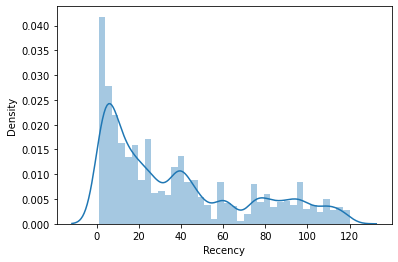

In [ ]:
#Recency distribution plot
import seaborn as sns
x = RFMScoring['Recency']
ax = sns.distplot(x)

In [ ]:
#Descriptive Statstics (Frequency)
RFMScoring.Frequency.describe()

count    32266.000000
mean        25.343736
std         34.717992
min          1.000000
25%          6.000000
50%         14.000000
75%         32.000000
max       1246.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


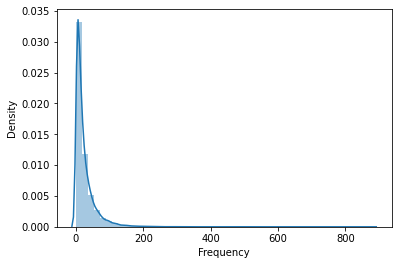

In [ ]:
#Frequency distribution plot, focus on frequency less than 1000
import seaborn as sns
x = RFMScoring.query('Frequency < 1000')['Frequency']
ax = sns.distplot(x)

In [ ]:
#Descriptive Statstics (Monetary)
RFMScoring.Monetary.describe()

count     32266.000000
mean       3342.220170
std        6215.318795
min           8.000000
25%         710.000000
50%        1765.500000
75%        4039.000000
max      459771.000000
Name: Monetary, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


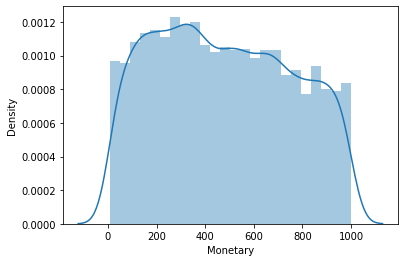